In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#сбалансировние данных
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
#разбиение данных
from sklearn.model_selection import train_test_split
# отбор признаков
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.decomposition import PCA

# cравнение оценок качества
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
# методы для кластеризации
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
# внешние оценки
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import rand_score, jaccard_score, silhouette_score, silhouette_samples, calinski_harabasz_score
# 
np.set_printoptions(threshold=100000, suppress=True)

# Task 1

In [13]:
data_house = pd.read_csv('paris_housing_preprocessed.csv')

In [16]:
X = data_house.iloc[:, :-1].values
y = data_house.iloc[:, 17].values
smote = SMOTE(random_state=100)
X, Y = smote.fit_resample(X, y)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [118]:
array = data_house.values
X = array[:,0:16]
Y = array[:,17]

In [7]:
data_house.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

## Одномерный отбор признаков

In [14]:
array = data_house.values
X = array[:,0:16]
Y = array[:,17]

# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)

In [ ]:
# summarize scores
np.set_printoptions(precision=5)
print(fit.scores_)
features = fit.transform(X)

Выбраны признаки: hasPool(7.38121e+02), isNewBuilt(7.28018e+02), numberOfRooms(6.87162e+02), garage(6.10919e+00), attic(5.46700e+02)

In [18]:
# summarize selected features
print(features[0:10,:])

[[7.5523e+04 1.0000e+00 9.3730e+03 0.0000e+00 4.3130e+03]
 [8.0771e+04 1.0000e+00 3.9381e+04 1.0000e+00 3.6530e+03]
 [5.5712e+04 1.0000e+00 3.4457e+04 0.0000e+00 2.9370e+03]
 [3.2316e+04 0.0000e+00 2.7939e+04 0.0000e+00 6.5900e+02]
 [7.0429e+04 1.0000e+00 3.8045e+04 1.0000e+00 8.4350e+03]
 [3.9223e+04 1.0000e+00 3.9489e+04 0.0000e+00 2.0090e+03]
 [5.8682e+04 1.0000e+00 6.4500e+03 1.0000e+00 5.9300e+03]
 [8.6929e+04 0.0000e+00 9.8155e+04 1.0000e+00 6.3260e+03]
 [5.1522e+04 0.0000e+00 9.0470e+03 1.0000e+00 6.3200e+02]
 [3.9686e+04 0.0000e+00 7.1019e+04 1.0000e+00 5.1980e+03]]


## 2. Рекурсивное исключение признаков

In [ ]:
# Feature Extraction with RFE

array = data_house.values
X = array[:,0:16]
Y = array[:,17]

# feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, Y)

In [187]:
print("Num Features:", fit.n_features_) 
print("Num Features:", fit.support_) 
print("Feature Ranking:", fit.ranking_) 

Num Features: 5
Num Features: [False False  True  True False False False  True  True  True False False
 False False False False]
Feature Ranking: [ 9  4  1  1  5 10  2  1  1  1 11  7  8  6 12  3]


Выбраны признаки: hasYard, hasPool, numPrevOwners, made, isNewBuilt

## 3. Отбор на основе важности признаков

In [24]:
# Feature Importance with Extra Trees Classifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.00536 0.00549 0.34907 0.30918 0.00527 0.00494 0.00467 0.00516 0.00505
 0.28124 0.0025  0.00512 0.005   0.00496 0.00259 0.00439]


Выбраны признки: hasYard(0.33475), hasPool(0.3085), isNewBuilt(0.30336), attic(0.00473), numberOfRooms(0.00467)

## 4. Метод главных компонент

In [72]:
# feature extraction
pca = PCA(n_components=5) #n_components=5
fit = pca.fit(X)
features = fit.transform(X)

# summarize components
print("Explained Variance:", fit.explained_variance_ratio_)
#print(data_house.columns)
print(features[0:2,:])

Explained Variance: [4.99094e-01 4.90988e-01 4.97225e-03 4.90424e-03 4.07159e-05]
[[43095.14588 21676.82851 -4022.6171   -263.67721  -406.20417]
 [13716.37923 29738.38225  2194.11543  1941.38749   420.59165]]


## Оценка качества

### Начальный датасет

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

[[2497   94]
 [   0 2650]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2591
           1       0.97      1.00      0.98      2650

    accuracy                           0.98      5241
   macro avg       0.98      0.98      0.98      5241
weighted avg       0.98      0.98      0.98      5241

Accuracy score: 0.982064491509254


In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

[[2591    0]
 [   0 2650]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2591
           1       1.00      1.00      1.00      2650

    accuracy                           1.00      5241
   macro avg       1.00      1.00      1.00      5241
weighted avg       1.00      1.00      1.00      5241

Accuracy score: 1.0


### Датасет на основе одномерного отбора признаков

In [20]:
data_1 = data_house[['hasPool', 'isNewBuilt', 'numberOfRooms', 'garage', 'attic', 'category']]

X_1 = data_1.iloc[:,0:4]
Y_1 = data_1.iloc[:,5]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.3)

In [21]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_1, y_train_1)

y_pred_1 = clf.predict(X_test_1)
print(confusion_matrix(y_test_1, y_pred_1))
print(classification_report(y_test_1, y_pred_1))
print('Accuracy score:', accuracy_score(y_test_1, y_pred_1))

[[2298  326]
 [ 309   67]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2624
           1       0.17      0.18      0.17       376

    accuracy                           0.79      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.79      0.79      0.79      3000

Accuracy score: 0.7883333333333333


In [22]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_1, y_train_1)

y_pred_1 = clf.predict(X_test_1)
print(confusion_matrix(y_test_1, y_pred_1))
print(classification_report(y_test_1, y_pred_1))
print('Accuracy score:', accuracy_score(y_test_1, y_pred_1))

[[2411  213]
 [ 163  213]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2624
           1       0.50      0.57      0.53       376

    accuracy                           0.87      3000
   macro avg       0.72      0.74      0.73      3000
weighted avg       0.88      0.87      0.88      3000

Accuracy score: 0.8746666666666667


### Датасет на основе рекурсивного исключения признаков



In [24]:
data_2 = data_house[['hasYard', 'hasPool', 'numPrevOwners', 'made', 'isNewBuilt', 'category']]

X_2 = data_2.iloc[:,0:4]
Y_2 = data_2.iloc[:,5]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.3)

In [25]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_2, y_train_2)

y_pred_2 = clf.predict(X_test_2)
print(confusion_matrix(y_test_2, y_pred_2))
print(classification_report(y_test_2, y_pred_2))
print('Accuracy score:', accuracy_score(y_test_2, y_pred_2))

[[2435  180]
 [ 187  198]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2615
           1       0.52      0.51      0.52       385

    accuracy                           0.88      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.88      0.88      0.88      3000

Accuracy score: 0.8776666666666667


In [26]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_2, y_train_2)

y_pred_2 = clf.predict(X_test_2)
print(confusion_matrix(y_test_2, y_pred_2))
print(classification_report(y_test_2, y_pred_2))

[[2453  162]
 [ 217  168]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2615
           1       0.51      0.44      0.47       385

    accuracy                           0.87      3000
   macro avg       0.71      0.69      0.70      3000
weighted avg       0.87      0.87      0.87      3000



### Датасет отобраннный на основе важности признаков

In [27]:
data_3 = data_house[['hasYard', 'hasPool', 'isNewBuilt', 'attic', 'numberOfRooms', 'category']]

X_3 = data_3.iloc[:,0:4]
Y_3 = data_3.iloc[:,5]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, Y_3, test_size=0.3)

In [28]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_3, y_train_3)

y_pred_3 = clf.predict(X_test_3)
print(confusion_matrix(y_test_3, y_pred_3))
print(classification_report(y_test_3, y_pred_3))
print('Accuracy score:', accuracy_score(y_test_3, y_pred_3))

[[2513  112]
 [ 346   29]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2625
           1       0.21      0.08      0.11       375

    accuracy                           0.85      3000
   macro avg       0.54      0.52      0.51      3000
weighted avg       0.79      0.85      0.82      3000

Accuracy score: 0.8473333333333334


In [29]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_3, y_train_3)

y_pred_3 = clf.predict(X_test_3)
print(confusion_matrix(y_test_3, y_pred_3))
print(classification_report(y_test_3, y_pred_3))

[[2625    0]
 [   0  375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2625
           1       1.00      1.00      1.00       375

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



# Task 2

## K-Means

[Документация K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.score)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

kmeans = KMeans(n_clusters=2, algorithm='elkan').fit(X_train)
print(kmeans.cluster_centers_)
#print(model.labels_)
print('Score:', kmeans.score(X_test, y_test))

[[-0.86469243  0.02236188  0.04347061  0.03012791  0.01334151  0.01138137
   0.01414486 -0.05225365  0.00202845  0.02397221  0.02302337  0.00038269
   0.01757033  0.05033983  0.03135289 -0.0465617  -0.86466243]
 [ 0.85555294 -0.03616669 -0.01884007 -0.01511206 -0.01238546 -0.0136415
  -0.00742363  0.04195221 -0.0138997  -0.0255677  -0.02469759  0.01087112
  -0.02254657 -0.03628203 -0.02074588  0.03393889  0.85555286]]
Score: -81467.96796358316


In [239]:
print('Внешние меры оценки качества:')
print('Индекс Rand:', rand_score(kmeans.labels_, y_train))
print('Индекс Жаккара:', jaccard_score(kmeans.labels_, y_train))
print('\nВнутренние меры оценки качества:')
print('Коэффициент силуэта всех выборок:', silhouette_score(X_train, kmeans.labels_))
print('Индекс Calinski–Harabasz:', calinski_harabasz_score(X_train, kmeans.labels_))

Внешние меры оценки качества:
Индекс Rand: 0.49999458325184803
Индекс Жаккара: 0.3389664195377235

Внутренние меры оценки качества:
Коэффициент силуэта всех выборок: 0.08616121311593246
Индекс Calinski–Harabasz: 1188.3325346164254


**Индекс Rand** оценивает, насколько много из тех пар элементов, которые находились в одном классе, и тех пар элементов, которые находились в разных классах, сохранили это состояние после кластеризации алгоритмом. Имеет область определения от 0 до 1, где 1 — полное совпадение кластеров с заданными классами, а 0 — отсутствие совпадений.

**Индекс Жаккара** похож на Индекс Rand, только не учитывает пары элементов находящиеся в разные классах и разных кластерах.Имеет область определения от 0 до 1, где 1 — полное совпадение кластеров с заданными классами, а 0 — отсутствие совпадений.

**Значение силуэта** показывает, насколько объект похож на свой кластер по сравнению с другими кластерами. Принимает значения от -1 до 1, но чем ближе данная оценка к 1, тем лучше.

**Индекс Calinski–Harabasz**. Компактность основана на расстоянии от точек кластера до их центроидов, а разделимость - на расстоянии от центроид кластеров до глобального центроида. Должен возрастать.


## Hierarchical clustering

In [ ]:
model2 = AgglomerativeClustering(n_clusters = 2).fit(X)

pred = model2.labels_
print(pred)

In [9]:
print('Внешние меры оценки качества:')
print('Индекс Rand:', rand_score(model2.labels_, Y))
print('Индекс Жаккара:', jaccard_score(model2.labels_, Y))
print('\nВнутренние меры оценки качества:')
print('Коэффициент силуэта всех выборок:', silhouette_score(X, model2.labels_))
print('Индекс Calinski–Harabasz:', calinski_harabasz_score(X, model2.labels_))

Внешние меры оценки качества:
Индекс Rand: 0.931110912542008
Индекс Жаккара: 0.0012450346831090295

Внутренние меры оценки качества:
Коэффициент силуэта всех выборок: 0.08156712037588194
Индекс Calinski–Harabasz: 1256.533818406738


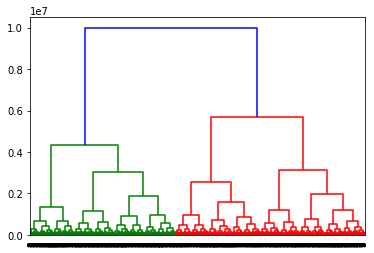

In [161]:
varieties = list(data_house.pop('category'))
samples = data_house.values

mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

## t-SNE

[Документация t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


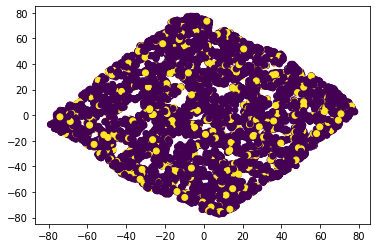

In [167]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(X)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=Y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


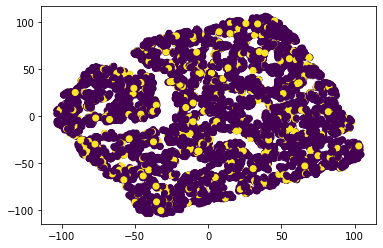

In [169]:
model = TSNE(perplexity=20, learning_rate=500)
transformed = model.fit_transform(X)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=Y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


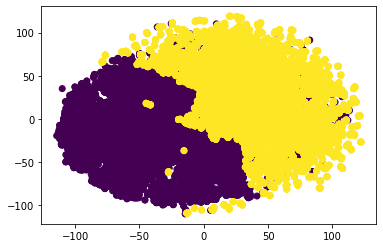

In [198]:
model = TSNE(perplexity=20, early_exaggeration=25, learning_rate=1000)
transformed = model.fit_transform(X)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=Y)
plt.show()

## DBSCAN

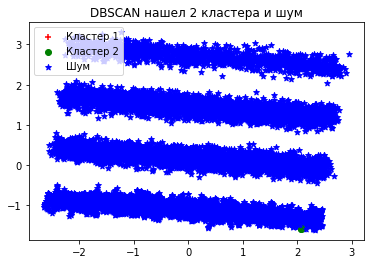

In [199]:
dbscan = DBSCAN() 
dbscan.fit(X)
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

In [248]:
dbscan = DBSCAN() 
dbscan.fit(X_train)

print('Внешние меры оценки качества:')
print('Индекс Rand:', rand_score(dbscan.labels_, y_train))
print('Индекс Жаккара:', jaccard_score(dbscan.labels_, y_train, average='micro'))
print('\nВнутренние меры оценки качества:')
print('Коэффициент силуэта всех выборок:', silhouette_score(X_train, dbscan.labels_))
print('Индекс Calinski–Harabasz:', calinski_harabasz_score(X_train, dbscan.labels_))

Внешние меры оценки качества:
Индекс Rand: 0.4999453644044427
Индекс Жаккара: 0.000286286859433152

Внутренние меры оценки качества:
Коэффициент силуэта всех выборок: -0.28319271479424185
Индекс Calinski–Harabasz: 5.115492206002893
